# LLM Hallucination

### What are LLM hallucinations?
LLM hallucinations refer to instances where LLMs generate information that is incorrect, nonsensically structured,  or unrelated to the input provided. This information can vary from minor errors to larger issues like fabrications  and distortions of facts, frequently leading to user confusion or creating a misleading impression of the models'   comprehension and output capabilities.   

## Types of LLM hallucinations

| Type                | Turn          | Example                                                                                                                        | Explanation                                                                                                                                                       |
|---------------------|---------------|--------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Input conflicting   | User          | Please summarize the following content: My friend Hill and I love playing basketball together. We spend hours on the court, dribbling, shooting, and competing against each other. Our passion for this game brings us closer as good friends. | The user provides content about playing basketball with a friend named Hill.                                                                                      |
|                     | Model         | Lucas and I love playing basketball, and this makes us good friends.                                                            | The model incorrectly changes the friend's name from Hill to Lucas while summarizing.                                                                             |
| Nonsensical response | User          | Tell me something about the NBA Commissioner.                                                                                   | The user asks about the NBA Commissioner.                                                                                                                        |
|                     | Model         | In the world’s most popular basketball league, the NBA, Commissioner Adam Silver has long been regarded as a leader...       | The model starts with Adam Silver but then randomly switches to mentioning Stern, introducing a nonsensical response.                                            |
| Factual inaccuracies| User          | Who was the mother of Afonso II, the third king of Portugal?                                                                    | The user asks about the mother of Afonso II.                                                                                                                     |
|                     | Model         | The mother of Afonso II was Queen Urraca of Castile.                                                                            | The model incorrectly identifies Queen Urraca of Castile as the mother of Afonso II. The correct mother is Dulce Berenguer of Barcelona.                          |


https://github.com/vectara/hallucination-leaderboard

## Strategies to reduce LLM hallucinations

### A. Prompt engineering examples

1. **Manual prompt engineering** involves crafting prompts by hand to guide the model toward generating the desired output. It’s a creative process that relies on understanding how the model responds to different input types.

Example—generating a poem

In [ ]:
prompt = "Write a poem about the sea:"
response = model.generate(prompt)
print(response)

2. **Prompt templates** use placeholders or variables that can be filled with specific information to generate tailored prompts. This approach allows for dynamic prompt generation based on the task’s context.

Example—product description

In [ ]:
product_name = "Eco-friendly Water Bottle"
product_features = "reusable, made from recycled materials, keeps drinks cold for 24 hours"

prompt = f"Describe the product: {product_name}, which is {product_features}."
response = model.generate(prompt)
print(response)

3. **Chain-of-thought** prompting mimics a reasoning process, guiding the model to “think aloud” as it generates its response. This can be particularly useful for complex problem-solving or reasoning tasks.

Example—solving a math problem

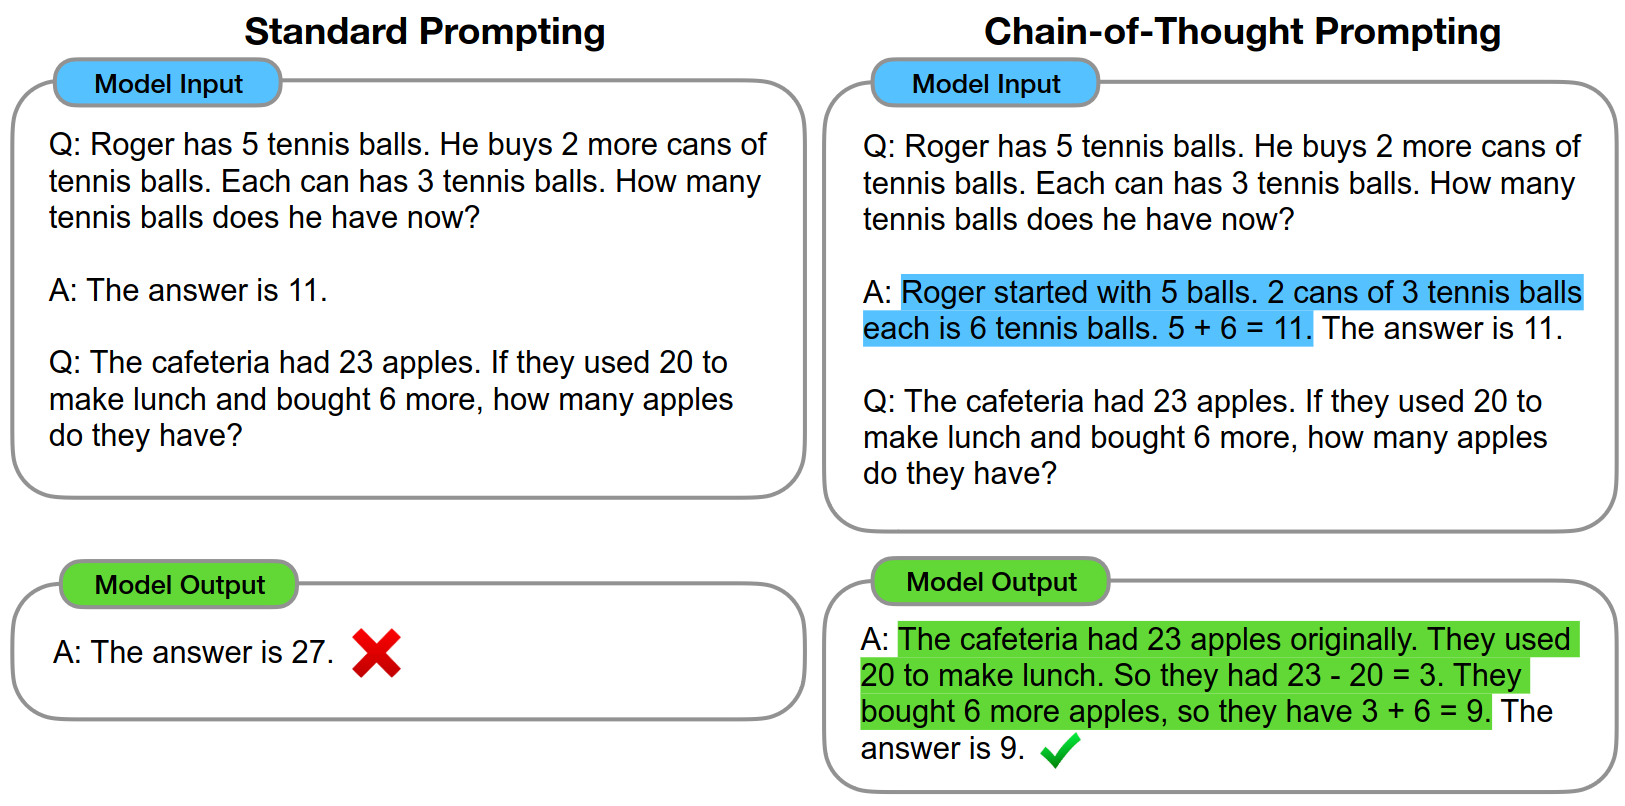

4. **Zero-shot learning** and **few-shot learning** involve providing a prompt that instructs the model to perform a task it wasn’t explicitly trained on without any examples. Few-shot learning includes a few examples within the prompt to guide the model.

Zero-shot example—translation

In [ ]:
prompt = "Translate to French: 'Hello, how are you today?'"
response = model.generate(prompt)
print(response)

Few-shot example—sentiment analysis

In [ ]:
prompt = """1. "This movie is fantastic!" - Positive
2. "It was a terrible experience." - Negative
3. "I've had better meals." - Negative
4. "An utterly delightful concert!" - Positive
5. "The service at the restaurant is not good." - ?"""

response = model.generate(prompt)
print(response)

5. **Soft prompt engineering** involves learning a set of embeddings (soft prompts) that are prepended to the input to steer the model toward the desired output. The method typically requires gradient-based optimization but does not modify the original model parameters.

Example—custom embedding for a specific task

In [ ]:
# Conceptual code snippet
soft_prompt = learn_soft_prompt("Summarize text")
input_text = "The history of Rome is complex and fascinating..."

prompt = soft_prompt + input_text
response = model.generate(prompt)
print(response)

### B. Retrieval-Augmented Generation (RAG)
Generic models cannot infer reliably beyond the data distribution they learned from. Often, they require additional context when generating text for downstream applications. Retrieval-Augmented Generation (RAG) is a method that appends the prompt with embeddings derived from domain-specific knowledge base.

<img src="https://assets-global.website-files.com/614c82ed388d53640613982e/654a0f54450e6098a498f2a6_retrieval-augmented-generation.webp" alt="drawing" width="800"/>

In [ ]:
from transformers import RagTokenizer, RagTokenForGeneration, RagRetriever
import torch

def initialize_rag():
    # Initialize the tokenizer, model, and retriever
    tokenizer = RagTokenizer.from_pretrained("facebook/rag-token-nq")
    retriever = RagRetriever.from_pretrained("facebook/rag-token-nq", index_name="exact", use_dummy_dataset=True)
    model = RagTokenForGeneration.from_pretrained("facebook/rag-token-nq", retriever=retriever)
    return tokenizer, model

def generate_answer(tokenizer, model, question):
    # Encode the inputs
    inputs = tokenizer(question, return_tensors="pt")
    
    # Generate the answer with RAG using the retriever and the generator
    answer_ids = model.generate(input_ids=inputs['input_ids'], num_beams=3)
    answer = tokenizer.decode(answer_ids[0], skip_special_tokens=True)
    
    return answer

# Example usage
tokenizer, model = initialize_rag()
question = "What are the health benefits of drinking green tea?"
answer = generate_answer(tokenizer, model, question)
print("Answer:", answer)

### C. Domain-specific fine-tuning
Fine-tuning is a common approach that ML teams use to teach a model new knowledge while retaining its existing competencies, particularly in tasks related to processing natural language. The technique also helps shape the model’s response and prevent it from exhibiting undesirable behaviors. As the model is re-trained with domain-specific knowledge, it is less likely to make up plausible but untruth responses.

In fine-tuning, the model is further trained on a new dataset that is usually smaller and more task-specific than the original dataset. The process aims to adapt the generalized learning of the pre-trained model to the specific characteristics of the new dataset, thereby improving its performance on tasks related to that dataset.

### The fine-tuning process
The fine-tuning process involves the following steps.

**Data selection and preparation**
Selecting high-quality, relevant data is an important first step. The data should closely mirror the tasks or contexts the model will encounter, encompassing diverse examples to cover various scenarios within the target domain. Preparing this data involves cleaning, labeling (if applicable), and possibly augmenting it to ensure the model has a robust dataset to learn from.

**Hyperparameter adjustments**
You can alter the model’s hyperparameters or incorporate task-specific layers to better suit particular tasks. For example, you can add a specialized output layer for a classification task or fine-tune the learning rate. For very large models with  100 million to 1 billion+ parameters, alternative adaptation methods, such as Low-Rank Adaptation (LoRA), may also be used. LoRA is a popular and lightweight training technique that significantly reduces the number of trainable parameters. It works by inserting a smaller number of new weights into the model, and only these are trained. 

**Training and optimization**
The crux of fine-tuning involves training the model further on the selected dataset. This step requires careful management of learning rates, batch sizes, and other training parameters to avoid overfitting. Overfitting occurs when a model becomes too attuned to the training data, impairing its ability to generalize to new, unseen data.   

Training techniques such as dropout, regularization, and cross-validation can help mitigate this risk of overfitting.  

Dropout randomly drops out a fraction of neurons (individual computational units within the neural network architecture) to prevent co-adaptation among neurons.   
Regularization involves adding penalty terms to the loss function to discourage overly complex models and improve generalization performance on unseen data.  
*Cross-validation is a technique used to assess the generalization performance of LLMs by partitioning the available data into subsets, training the model on one subset, and evaluating its performance on another, iteratively rotating through all possible combinations to ensure robustness in model evaluation.*  
The optimization process also includes continuous monitoring of performance metrics to ensure the model is improving and adjusting training parameters as needed to optimize outcomes.  